In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical    # Converts class labels to one-hot encoded vectors.
import random, shutil
from keras.models import Sequential
from keras.layers import (
    Dropout,
    Conv2D,
    Flatten,
    Dense,
    MaxPooling2D,
    BatchNormalization,
)
from keras.models import load_model

def generator(
    dir,
    gen=ImageDataGenerator(rescale=1.0 / 255),
    shuffle=True,
    batch_size=1,
    target_size=(24, 24),
    class_mode="categorical",
):
    return gen.flow_from_directory(
        dir,
        batch_size=batch_size,
        shuffle=shuffle,
        color_mode="grayscale",
        class_mode=class_mode,
        target_size=target_size,
    )

BS = 32
TS = (24, 24)
train_batch = generator("C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\dataset\\dataset_new\\train", shuffle=True, batch_size=BS, target_size=TS)
valid_batch = generator("C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\dataset\\dataset_new\\test", shuffle=True, batch_size=BS, target_size=TS)
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS
print(SPE, VS)

img, labels = next(train_batch)
print(img.shape)

cnn_model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(2, activation="softmax"),
    ]
)
cnn_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Capture history
history = cnn_model.fit(
    train_batch,
    validation_data=valid_batch,
    epochs=50,
    steps_per_epoch=SPE,
    validation_steps=VS,
)

cnn_model.save("C:\\Users\\cbpan\\Downloads\\models\\cnnCat4.h5", overwrite=True)

#These calculate the number of batches required per epoch for training and validation data.

#ReLU is a popular activation function in CNNs because it introduces non-linearity, is fast to compute, and helps avoid vanishing gradients during training.

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6
(32, 24, 24, 1)


C:\Users\cbpan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50


C:\Users\cbpan\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 516ms/step - accuracy: 0.7039 - loss: 0.5449 - val_accuracy: 0.8906 - val_loss: 0.2536
Epoch 2/50
 1/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8750 - loss: 0.2474

C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8750 - loss: 0.1269 - val_accuracy: 0.8846 - val_loss: 0.1353
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.8995 - loss: 0.2528 - val_accuracy: 0.9479 - val_loss: 0.1385
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8750 - loss: 0.0853 - val_accuracy: 0.9231 - val_loss: 0.1521
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.9440 - loss: 0.1430 - val_accuracy: 0.9479 - val_loss: 0.1427
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.0374 - val_accuracy: 1.0000 - val_loss: 0.0435
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.9612 - loss: 0.1148 - val_accuracy: 0.9531 - val_loss: 0.1304
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.1657 - val_accuracy: 0.9231 - val_loss: 0.0619
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.9671 - loss: 0.0928 - val_accuracy: 0.9479 - val_los

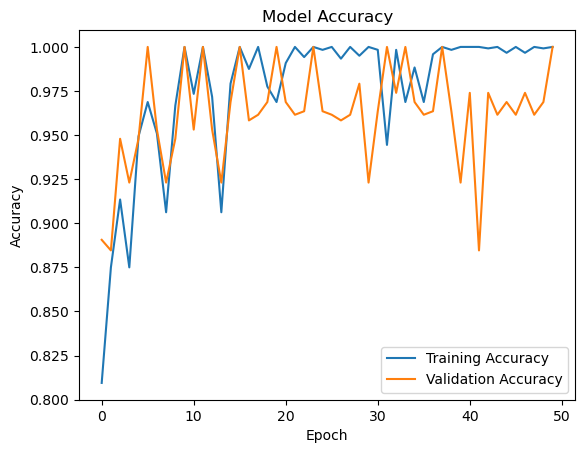

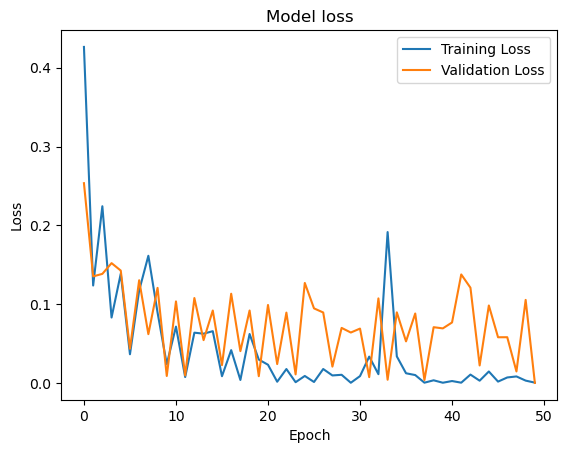

In [2]:

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()


In [3]:
!pip install tensorflow
!pip install keras.utils.np_utils

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement keras.utils.np_utils (from versions: none)
ERROR: No matching distribution found for keras.utils.np_utils


In [4]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pygame


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mediapipe --user

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install mediapipe 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install opencv-python dlib pygame keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
%%cmd
pip install face-recognition 

Microsoft Windows [Version 10.0.22631.3593]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\cbpan\Desktop\CIE\PAML>pip install face-recognition 
Defaulting to user installation because normal site-packages is not writeable

(base) C:\Users\cbpan\Desktop\CIE\PAML>

In [11]:
%%cmd
pip install cmake

Microsoft Windows [Version 10.0.22631.3593]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\cbpan\Desktop\CIE\PAML>pip install cmake
Defaulting to user installation because normal site-packages is not writeable

(base) C:\Users\cbpan\Desktop\CIE\PAML>

In [12]:
%%cmd
pip install "C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\dlib-19.24.1-cp311-cp311-win_amd64.whl"

Microsoft Windows [Version 10.0.22631.3593]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\cbpan\Desktop\CIE\PAML>pip install "C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\dlib-19.24.1-cp311-cp311-win_amd64.whl"
Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\cbpan\desktop\cie\paml\dlib-19.24.1-cp311-cp311-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.

(base) C:\Users\cbpan\Desktop\CIE\PAML>

In [13]:
%%cmd
pip install face-recognition 

Microsoft Windows [Version 10.0.22631.3593]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\cbpan\Desktop\CIE\PAML>pip install face-recognition 
Defaulting to user installation because normal site-packages is not writeable

(base) C:\Users\cbpan\Desktop\CIE\PAML>

In [14]:
pip install imutils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
#code combined for both ear n mar

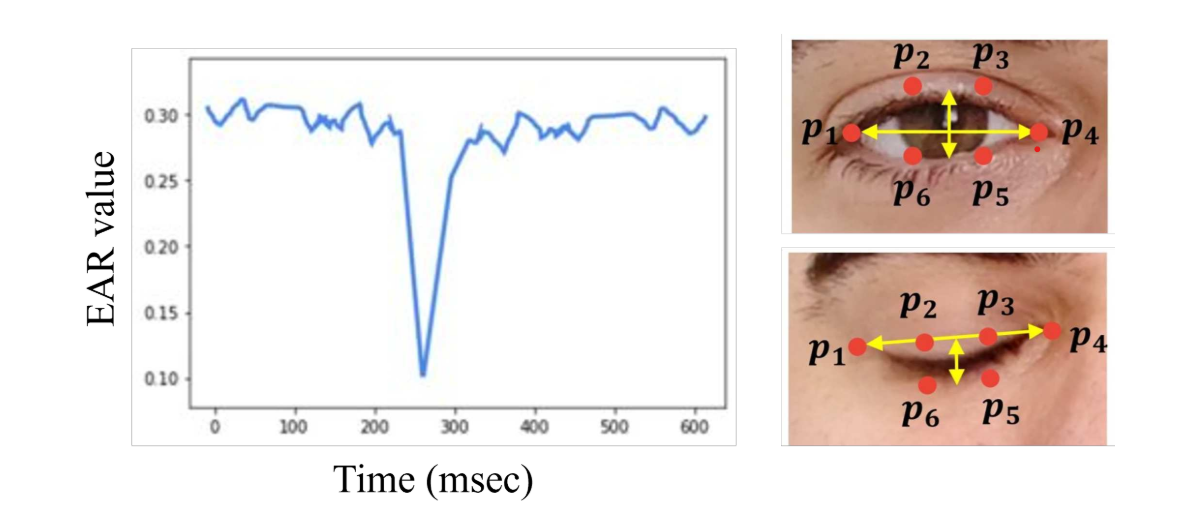

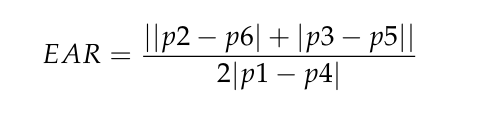

Mouth Aspect Ratio (MAR): 0.11094003924504582
Mouth Aspect Ratio (MAR): 0.1875
Mouth Aspect Ratio (MAR): 0.052558833122763673
Mouth Aspect Ratio (MAR): 0.15767649936829103
Mouth Aspect Ratio (MAR): 0.2890735821752002
Mouth Aspect Ratio (MAR): 0.08972354043512198
Mouth Aspect Ratio (MAR): 0.04993761694389223
Mouth Aspect Ratio (MAR): 0.300439253705024
Mouth Aspect Ratio (MAR): 0.10468478451804275
Mouth Aspect Ratio (MAR): 0.09469324665015971
Mouth Aspect Ratio (MAR): 0.15512798895724703
Mouth Aspect Ratio (MAR): 0.2996257016633534
Mouth Aspect Ratio (MAR): 0.16641005886756874
Mouth Aspect Ratio (MAR): 0.1638802280858109
Mouth Aspect Ratio (MAR): 0.27807764064044155
Mouth Aspect Ratio (MAR): 0.3362344534694648
Mouth Aspect Ratio (MAR): 0.26424909878161656
Mouth Aspect Ratio (MAR): 0.1875
Mouth Aspect Ratio (MAR): 0.24961508830135312
Mouth Aspect Ratio (MAR): 0.19975046777556893
Mouth Aspect Ratio (MAR): 0.19636337336471263
Mouth Aspect Ratio (MAR): 0.1638802280858109
Mouth Aspect Ratio (

Mouth Aspect Ratio (MAR): 0.5872202195147035
Mouth Aspect Ratio (MAR): 0.5302154323190345
Mouth Aspect Ratio (MAR): 0.7621030802800732
Mouth Aspect Ratio (MAR): 0.558156305651438
Mouth Aspect Ratio (MAR): 0.4404151646360276
Mouth Aspect Ratio (MAR): 0.7765237322927032
Mouth Aspect Ratio (MAR): 0.5862821507870478
Mouth Aspect Ratio (MAR): 0.6237828615518053
Mouth Aspect Ratio (MAR): 0.7602699924182459
Mouth Aspect Ratio (MAR): 0.5544425285048947
Mouth Aspect Ratio (MAR): 0.5824352060364906
Mouth Aspect Ratio (MAR): 0.6459422414661737
Mouth Aspect Ratio (MAR): 0.6459422414661737
Mouth Aspect Ratio (MAR): 0.5015671781479635
Mouth Aspect Ratio (MAR): 0.47424147397244704
Mouth Aspect Ratio (MAR): 0.665640235470275
Mouth Aspect Ratio (MAR): 0.5547001962252291
Mouth Aspect Ratio (MAR): 0.5274559518597555
Mouth Aspect Ratio (MAR): 0.26279416561381835
Mouth Aspect Ratio (MAR): 0.21404317236952233
Mouth Aspect Ratio (MAR): 0.15570718694822863
Mouth Aspect Ratio (MAR): 0.09571067811865475
Mouth A

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Mouth Aspect Ratio (MAR): 0.03885814217979053
Eye Aspect Ratio (EAR): 1.0932880554896238
No eyes detected.
Eye Aspect Ratio (EAR): 1.1725690423448214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Mouth Aspect Ratio (MAR): 0.04828670849847379
Eye Aspect Ratio (EAR): 1.1420133840268658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Mouth Aspect Ratio (MAR): 0.04816209743009517
Eye Aspect Ratio (EAR): 1.087423182273628
No eyes detected.
Eye Aspect Ratio (EAR): 1.0390761317526886
No eyes detected.
Eye Aspect Ratio (EAR): 1.0823683912127329
No eyes detected.
Eye Aspect Ratio (EAR): 1.147792688899379
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Drowsiness detected!
Mouth Aspect Ratio (MAR): 0.07975167046025271
Eye Aspect Ratio (EAR): 1.0842278629673032
No eyes detected.
Eye Aspect Ratio (EAR): 1.0982403941535583
No eyes detected.
Eye Aspect Ratio (EAR): 1.14118099558583
No eyes detected.
Eye Aspect Ratio (EAR): 1.106944598584598
No eyes detected.
Eye Aspect Ratio (EAR): 1.13288

No eyes detected.
Eye Aspect Ratio (EAR): 1.2519600873477406
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Mouth Aspect Ratio (MAR): 0.10694768349937206
Eye Aspect Ratio (EAR): 1.301731802633299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Mouth Aspect Ratio (MAR): 0.25107867199016504
Eye Aspect Ratio (EAR): 1.313781857254659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Mouth Aspect Ratio (MAR): 0.2023131044979675
Eye Aspect Ratio (EAR): 1.2996404535025439
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Mouth Aspect Ratio (MAR): 0.24290927009735624
Eye Aspect Ratio (EAR): 1.1842430221177371
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Mouth Aspect Ratio (MAR): 0.2043468666786877
Eye Aspect Ratio (EAR): 1.3655564942388054
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Mouth Aspect Ratio (MAR): 0.19589550434031877
Eye Aspect Ratio (EAR): 1.2602008831025509
No eyes detected.
Eye Aspect Ratio (EAR): 1.1901628411775047
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Mouth Aspect Ratio (MAR): 0.2592431738017824
Eye Aspect Ratio (EAR): 1.20509197512

No eyes detected.
Eye Aspect Ratio (EAR): 1.1981748378619896
No eyes detected.
Eye Aspect Ratio (EAR): 1.2381556893948182
No eyes detected.
Eye Aspect Ratio (EAR): 1.2044150189606857
No eyes detected.
Eye Aspect Ratio (EAR): 1.2293693514939106
No eyes detected.
Eye Aspect Ratio (EAR): 1.2017672834595732
No eyes detected.
Eye Aspect Ratio (EAR): 1.2336583421862226
No eyes detected.
Eye Aspect Ratio (EAR): 1.2234231552087427
No eyes detected.
Eye Aspect Ratio (EAR): 1.234886757408951
No eyes detected.
Eye Aspect Ratio (EAR): 1.1382082972473975
No eyes detected.
Eye Aspect Ratio (EAR): 1.159925437592579
No eyes detected.
Eye Aspect Ratio (EAR): 1.1878868668159024
No eyes detected.
Eye Aspect Ratio (EAR): 1.1990463132851057
No eyes detected.
Eye Aspect Ratio (EAR): 1.2460057502344892
No eyes detected.
Eye Aspect Ratio (EAR): 1.2169426022375422
No eyes detected.
Eye Aspect Ratio (EAR): 1.189266723294034
No eyes detected.
Eye Aspect Ratio (EAR): 1.1713934270578432
No eyes detected.
Eye Aspec

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Mouth Aspect Ratio (MAR): 0.12143715095498754
Eye Aspect Ratio (EAR): 1.3183780486189276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Drowsiness detected!
Mouth Aspect Ratio (MAR): 0.4676282562386104
Eye Aspect Ratio (EAR): 1.3063124459433815
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Drowsiness detected!
Mouth Aspect Ratio (MAR): 0.3582629405894489
Eye Aspect Ratio (EAR): 1.3606313487211334
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Drowsiness detected!
Mouth Aspect Ratio (MAR): 0.396342974119689
Eye Aspect Ratio (EAR): 1.362230366563857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Drowsiness detected!
Mouth Aspect Ratio (MAR): 0.40013099701089494


ProgrammingError: Failed processing format-parameters; Python 'float64' cannot be converted to a MySQL type

In [ ]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
from keras.models import load_model
from pygame import mixer
from mediapipe import solutions
import dlib
from scipy.spatial import distance as dist
from imutils import face_utils
import cv2
import time
import datetime
from PIL import Image
from IPython.display import display
import mysql.connector  # Import the MySQL connector library
import pandas as pd

# Path to model and resources
path = "C:\\Users\\cbpan\\Desktop\\CIE\\PAML"
model_path = "C:\\Users\\cbpan\\Downloads\\models\\cnnCat4.h5"
alarm_sound_path = "C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\alarm.wav"
ear_csv_path = "ear_values.csv"
mar_csv_path = "mar_values.csv"

# Initialize Pygame mixer for sound
mixer.init()
sound = mixer.Sound(alarm_sound_path)

# Function to calculate eye aspect ratio (EAR)
def calculate_eye_aspect_ratio(eye_landmarks):
    if len(eye_landmarks) == 6:
        eye_landmarks = np.array(eye_landmarks, dtype=np.float32)
        A = np.linalg.norm(eye_landmarks[1] - eye_landmarks[5])
        B = np.linalg.norm(eye_landmarks[2] - eye_landmarks[4])
        C = np.linalg.norm(eye_landmarks[0] - eye_landmarks[3])
        ear = (A + B) / (2.0 * C)
        return ear
    else:
        return 0
    
img = Image.open('img.png')
img1=Image.open('img1.png')
display(img)
display(img1)

# Function to calculate mouth aspect ratio (MAR)
def cal_Mar(shape):
    p1=shape[60]
    p2=shape[61]
    p3=shape[62]
    p4=shape[63]
    p5=shape[64]
    p6=shape[65]
    p7=shape[66]
    p8=shape[67]
    
    mar=((dist.euclidean(p2,p8)+dist.euclidean(p3,p7)+dist.euclidean(p4,p6))/(2*dist.euclidean(p1,p5)))
    return mar

# Load the cascade classifiers for face, left eye, and right eye
face_cascade = cv2.CascadeClassifier("C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\haar cascade files\\haarcascade_frontalface_alt.xml")
leye_cascade = cv2.CascadeClassifier("C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\haar cascade files\\haarcascade_lefteye_2splits.xml")
reye_cascade = cv2.CascadeClassifier("C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\haar cascade files\\haarcascade_righteye_2splits.xml")

# Load the CNN model for drowsiness detection
model = load_model(model_path)

# Initialize MediaPipe face mesh solution
face_mesh = solutions.face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1)

# Initialize Dlib face detector and shape predictor for yawning detection
face_model = dlib.get_frontal_face_detector()
landmark_model = dlib.shape_predictor("C:\\Users\\cbpan\\Desktop\\CIE\\PAML\\shape_predictor_68_face_landmarks.dat")
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
score = 0
ear_values = []
mar_values = []

# Open webcam for video capture
cap = cv2.VideoCapture(0)

# Initialize variables for yawning detection
yawn_counter = 0
start_time = time.time()

# Initialize variables for consecutive MAR exceeding threshold
consecutive_mar_count = 0
mar_threshold_count = 4  # Number of consecutive frames MAR should exceed threshold
mar_threshold = 0.65

# Initialize MySQL database connection
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password",
    database="DB1"
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Initialize empty list to store alarm timestamps
alarm_timestamps = []

# Create a table for storing alarm timestamps if it doesn't exist
create_table_query = """
CREATE TABLE IF NOT EXISTS alarm_timestamps (
    id INT AUTO_INCREMENT PRIMARY KEY,
    timestamp DATETIME
)
"""

cursor.execute(create_table_query)

# Create a table for storing EAR values if it doesn't exist
create_ear_table_query = """
CREATE TABLE IF NOT EXISTS ear_values (
    id INT AUTO_INCREMENT PRIMARY KEY,
    frame INT,
    ear FLOAT
)
"""

cursor.execute(create_ear_table_query)

# Create a table for storing MAR values if it doesn't exist
create_mar_table_query = """
CREATE TABLE IF NOT EXISTS mar_values (
    id INT AUTO_INCREMENT PRIMARY KEY,
    frame INT,
    mar FLOAT
)
"""

cursor.execute(create_mar_table_query)

score_crossed_80 = False

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Process frame to obtain face landmarks using MediaPipe
    face_mesh_results = face_mesh.process(frame)
    
    if face_mesh_results.multi_face_landmarks:
        # Extract eye landmarks
        right_eye_landmarks = [(int(p.x * frame.shape[1]), int(p.y * frame.shape[0])) for p in face_mesh_results.multi_face_landmarks[0].landmark[36:42]]
        left_eye_landmarks = [(int(p.x * frame.shape[1]), int(p.y * frame.shape[0])) for p in face_mesh_results.multi_face_landmarks[0].landmark[42:48]]
        
        # Calculate EAR for right eye and left eye
        right_eye_ear = calculate_eye_aspect_ratio(right_eye_landmarks)
        left_eye_ear = calculate_eye_aspect_ratio(left_eye_landmarks)
        
        # Average EAR of both eyes
        ear = (right_eye_ear + left_eye_ear) / 2.0
        
        # Print EAR for monitoring
        print(f"Eye Aspect Ratio (EAR): {ear}")
        ear_values.append(ear)  # Append EAR value to list for CSV
        
        # Detect drowsiness using the CNN model and EAR calculation
        # Prepare input for the CNN model
        if leye_cascade.empty() or reye_cascade.empty():
            print("Cascade classifier failed to load.")
            continue
        
        left_eye = leye_cascade.detectMultiScale(gray)
        right_eye = reye_cascade.detectMultiScale(gray)
        
        l_eye = None
        r_eye = None
        
        for (x, y, w, h) in right_eye:
            r_eye = gray[y:y+h, x:x+w]
            r_eye = cv2.resize(r_eye, (24, 24))
            r_eye = np.expand_dims(r_eye, axis=-1)
            r_eye = np.expand_dims(r_eye, axis=0)
            break
            
        for (x, y, w, h) in left_eye:
            l_eye = gray[y:y+h, x:x+w]
            l_eye = cv2.resize(l_eye, (24, 24))
            l_eye = np.expand_dims(l_eye, axis=-1)
            l_eye = np.expand_dims(l_eye, axis=0)
            break
        
        if l_eye is None or r_eye is None:
            print("No eyes detected.")
            continue
            
        img_size = (224, 224)
        img = cv2.resize(frame, img_size)
        img = np.expand_dims(img, axis=0)
        img = img / 255.0
        
        # Predict drowsiness using the CNN model
        results = model.predict([l_eye, r_eye, img])
        
        # Extract the probability of drowsiness from CNN model prediction
        drowsiness_prob = results[0][0]
        
        if drowsiness_prob > 0.5 or ear < 0.2:
            print("Drowsiness detected!")
            score += 1
        else:
            score -= 1
        
        # Ensure sleep score is non-negative
        score = max(score, 0)
        
        # Display sleep score on the frame
        cv2.putText(frame, f"Sleep Score: {score}", (10, frame.shape[0] - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
        
        # Check if sleep score exceeds threshold for alarm
        if score > 80 and not score_crossed_80:
            try:
                
                sound.play()
                # Record the starting timestamp when the alarm is triggered for the first time
                alarm_timestamps.append(datetime.datetime.now())
                score_crossed_80 = True
            except:
                pass
            cv2.putText(frame, "ALERT! Drowsiness Detected", (10, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
    
    # Process frame for yawning detection
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_model(img_gray) 
    
    for face in faces: 
        shapes = landmark_model(img_gray, face) 
        shape = face_utils.shape_to_np(shapes) 

        mar = cal_Mar(shape)
        
        
        # Print MAR for monitoring
        print(f"Mouth Aspect Ratio (MAR): {mar}")
        
        # Displaying MAR value
        #cv2.putText(frame, f'MAR: {mar:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        mar_values.append(mar)  # Append MAR value to list for CSV
        
        # Check if MAR exceeds threshold
        if mar > mar_threshold:
            consecutive_mar_count += 1
        else:
            consecutive_mar_count = 0
        
        # Check if MAR has exceeded threshold for consecutive frames
        if consecutive_mar_count >= mar_threshold_count:
            # Reset consecutive MAR count
            consecutive_mar_count = 0
            # Increment yawn counter
            yawn_counter += 1
            if yawn_counter>=1:
                cv2.putText(frame,f"Yawn Detected!!{yawn_counter}",(10, 80), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
            # Check if yawn counter reaches 3
            if yawn_counter >= 3:
                try:
                    
                    sound.play()
                    alarm_timestamps.append(datetime.datetime.now())
                except:
                    pass
                cv2.putText(frame, "ALERT! Yawning Detected 3 Times", (10, 110), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
                # Reset yawn counter
                yawn_counter = 0

    # Check if a minute has passed
    current_time = time.time()
    if current_time - start_time >= 60:
        # Reset yawning counter and start time
        yawn_counter = 0
        start_time = current_time

    # Display the frame
    cv2.imshow('frame', frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close all windows
cap.release()
cv2.destroyAllWindows()

# Insert alarm timestamps into the MySQL database
for timestamp in alarm_timestamps:
    insert_query = "INSERT INTO alarm_timestamps (timestamp) VALUES (%s)"
    cursor.execute(insert_query, (timestamp,))

# Insert EAR values into the MySQL database
for i, ear in enumerate(ear_values):
    insert_query = "INSERT INTO ear_values (frame, ear) VALUES (%s, %s)"
    cursor.execute(insert_query, (i, ear))

# Insert MAR values into the MySQL database
for i, mar in enumerate(mar_values):
    insert_query = "INSERT INTO mar_values (frame, mar) VALUES (%s, %s)"
    cursor.execute(insert_query, (i, mar))

# Commit changes to the database
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

# Save EAR values to a CSV file
with open(ear_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Frame', 'EAR'])
    for i, ear in enumerate(ear_values):
        csvwriter.writerow([i, ear])

# Save MAR values to a CSV file
with open(mar_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Frame', 'MAR'])
    for i, mar in enumerate(mar_values):
        csvwriter.writerow([i, mar])

# Load the EAR values from the CSV file and plot a graph
loaded_ear_values = []
with open(ear_csv_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        loaded_ear_values.append(float(row[1]))

# Plotting the EAR values
plt.figure(figsize=(12, 6))
plt.plot(loaded_ear_values, label='EAR Values', color='blue')
plt.title('Eye Aspect Ratio (EAR) Over Frames')
plt.xlabel('Frame')
plt.ylabel('EAR')
plt.legend()
plt.grid(True)
plt.show()

# Load the MAR values from the CSV file and plot a graph
loaded_mar_values = []
with open(mar_csv_path, 'r', newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        loaded_mar_values.append(float64(row[1]))

# Plotting the MAR values
plt.figure(figsize=(12, 6))
plt.plot(loaded_mar_values, label='MAR Values', color='red')
plt.title('Mouth Aspect Ratio (MAR) Over Frames')
plt.xlabel('Frame')
plt.ylabel('MAR')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
pip install mysql-connector-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
